In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("../PythonProjects/input"))
# Any results you write to the current directory are saved as output.
from pandas import read_csv
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('../PythonProjects/input/housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

['housing.csv']
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


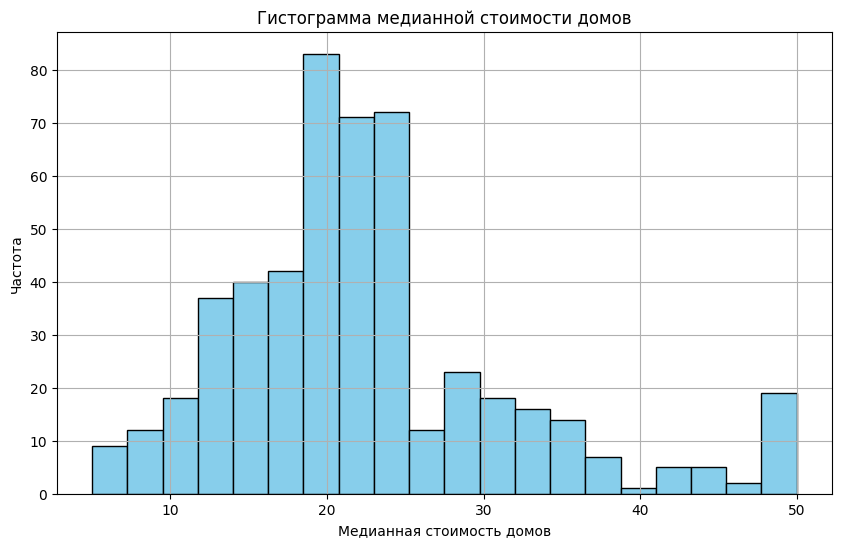

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['MEDV'], bins=20, color='skyblue', edgecolor='black')
plt.title('Гистограмма медианной стоимости домов')
plt.xlabel('Медианная стоимость домов')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


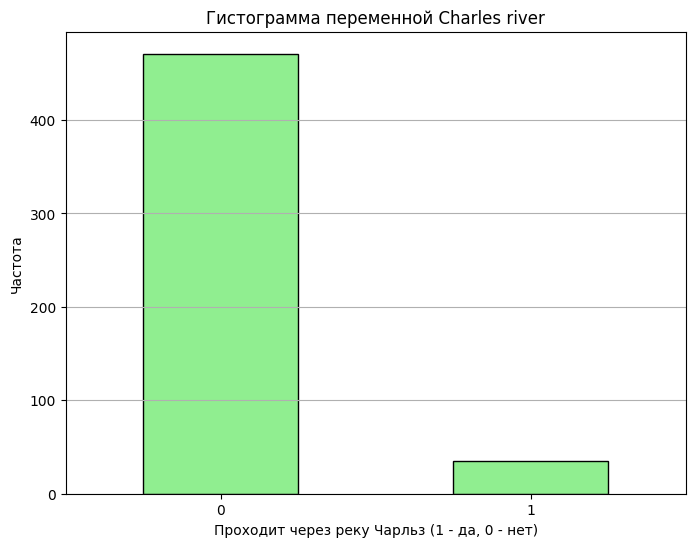

In [34]:
plt.figure(figsize=(8, 6))
data['CHAS'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Гистограмма переменной Charles river')
plt.xlabel('Проходит через реку Чарльз (1 - да, 0 - нет)')
plt.ylabel('Частота')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


C:\Users\thedr\AppData\Local\Temp\ipykernel_16908\3904966410.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('AGE_Group')['MEDV'].mean().plot(kind='bar', color='orange', edgecolor='black')


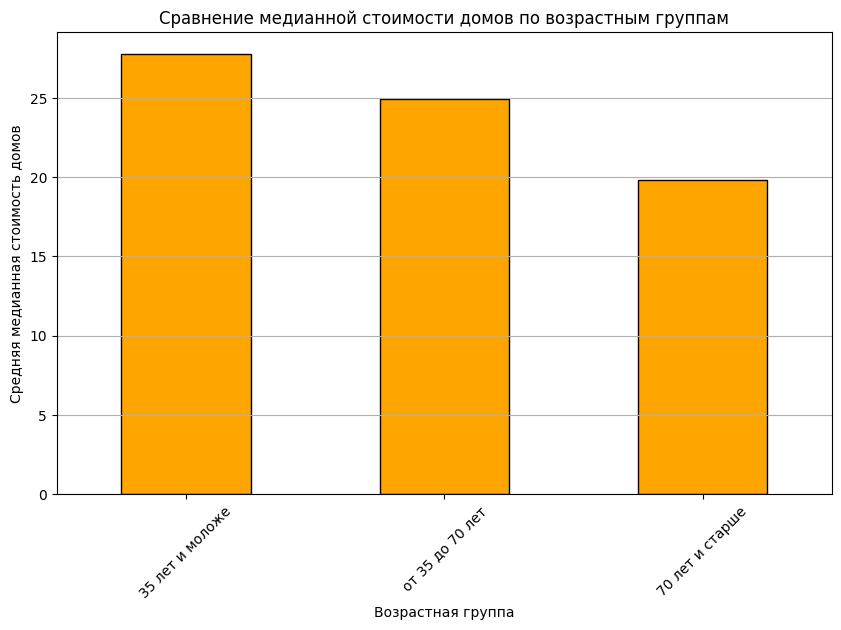

In [35]:
# Дискретизация переменной AGE
data['AGE_Group'] = pd.cut(data['AGE'], bins=[0, 35, 70, np.inf], labels=['35 лет и моложе', 'от 35 до 70 лет', '70 лет и старше'])

plt.figure(figsize=(10, 6))
data.groupby('AGE_Group')['MEDV'].mean().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Сравнение медианной стоимости домов по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Средняя медианная стоимость домов')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


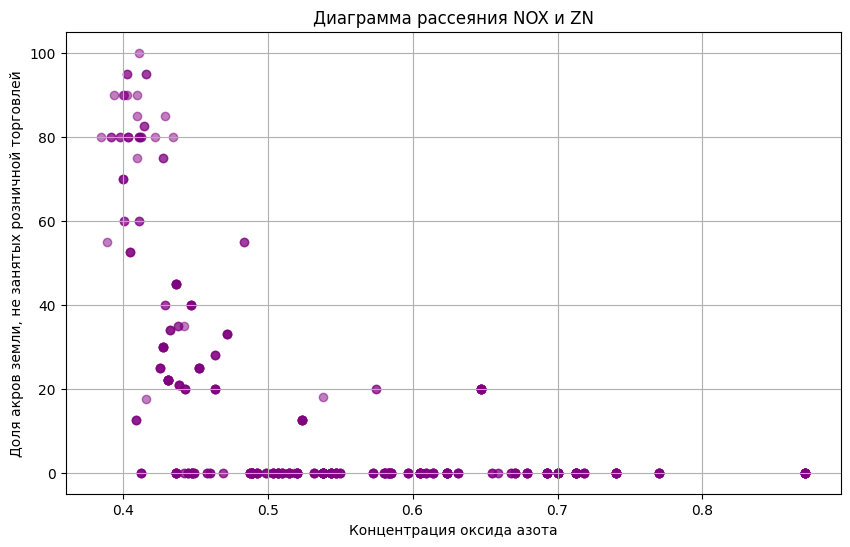

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(data['NOX'], data['ZN'], alpha=0.5, color='purple')
plt.title('Диаграмма рассеяния NOX и ZN')
plt.xlabel('Концентрация оксида азота')
plt.ylabel('Доля акров земли, не занятых розничной торговлей')
plt.grid(True)
plt.show()


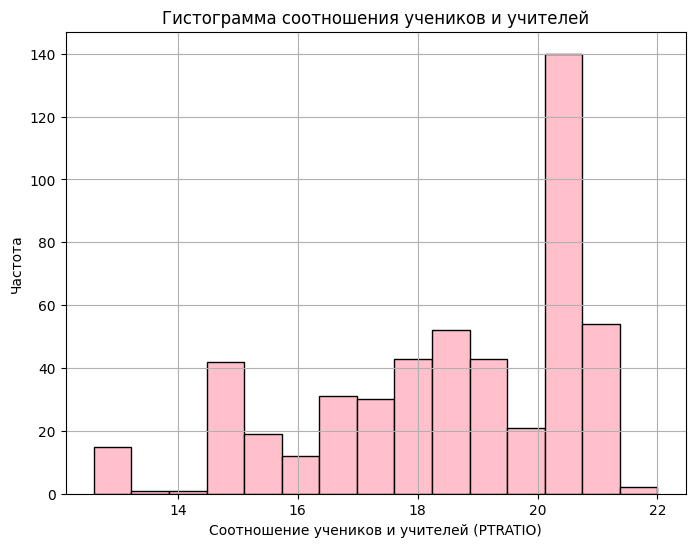

In [37]:
plt.figure(figsize=(8, 6))
plt.hist(data['PTRATIO'], bins=15, color='pink', edgecolor='black')
plt.title('Гистограмма соотношения учеников и учителей')
plt.xlabel('Соотношение учеников и учителей (PTRATIO)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


In [41]:
from scipy.stats import ttest_ind

river_yes = data[data['CHAS'] == 1]['MEDV']
river_no = data[data['CHAS'] == 0]['MEDV']

t_stat, p_value = ttest_ind(river_yes, river_no)

alpha = 0.05

if p_value < alpha:
    print("Отвергаем нулевую гипотезу.")
    print("Существует значительная разница в медианной стоимости домов, ограниченных и не ограниченных рекой Чарльз.")
else:
    print("Принимаем нулевую гипотезу.")
    print("Нет значительной разницы в медианной стоимости домов, ограниченных и не ограниченных рекой Чарльз.")


Отвергаем нулевую гипотезу.
Существует значительная разница в медианной стоимости домов, ограниченных и не ограниченных рекой Чарльз.


In [42]:
from scipy.stats import f_oneway

groups = []
for age_group, subset in data.groupby('AGE_Group'):
    groups.append(subset['MEDV'])

f_stat, p_value = f_oneway(*groups)

alpha = 0.05

if p_value < alpha:
    print("Отвергаем нулевую гипотезу.")
    print("Существует разница в медианной стоимости домов для разных категорий возраста.")
else:
    print("Принимаем нулевую гипотезу.")
    print("Нет разницы в медианной стоимости домов для разных категорий возраста.")


Отвергаем нулевую гипотезу.
Существует разница в медианной стоимости домов для разных категорий возраста.


C:\Users\thedr\AppData\Local\Temp\ipykernel_16908\509519852.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for age_group, subset in data.groupby('AGE_Group'):


In [45]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(data['NOX'], data['ZN'])

alpha = 0.05

if p_value < alpha:
    print("Отвергаем нулевую гипотезу.")
    print("Существует корреляция между концентрацией оксида азота и долей акров земли, занятых неторговыми предприятиями.")
else:
    print("Принимаем нулевую гипотезу.")
    print("Нет корреляции между концентрацией оксида азота и долей акров земли, занятых неторговыми предприятиями.")


Отвергаем нулевую гипотезу.
Существует корреляция между концентрацией оксида азота и долей акров земли, занятых неторговыми предприятиями.


In [49]:
import statsmodels.api as sm

X = data['DIS']
y = data['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        01:40:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0